In [ ]:
#Importing Some necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
import warnings
warnings.filterwarnings('ignore')

Libraries Imported

In [ ]:
#Importing Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Dataset Imported

In [ ]:
df.shape

(32560, 15)

As we can see there is 32560 rows and 15 columns in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In this dataset income is our target variable and it is an object datatype , actually it have classes between the Income we need to convert into numbers by encoding

In [ ]:
#Describing the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


As per the above observation we can say that there is no null value in the dataset

In [ ]:
#All Column Names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [ ]:
#Checking Null Values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we saw in above code that there is no null value in the dataset 

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

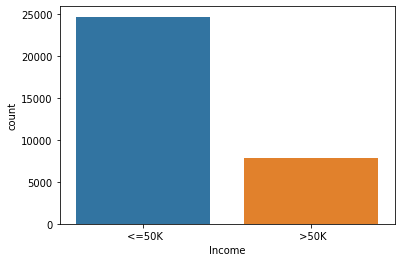

In [ ]:
sns.countplot(df['Income'])
df['Income'].value_counts()


As we can see there is imbalancing problem in the dataset ,In 32560 people only 7841 people have more than 50k income

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

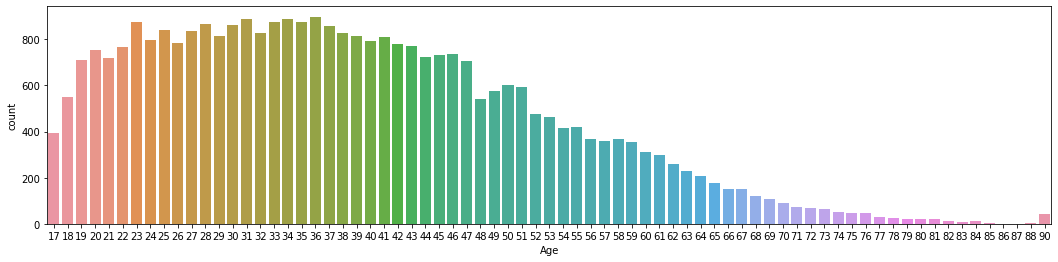

In [ ]:
plt.figure(figsize = (18,4))
sns.countplot(df['Age'])
df['Age'].value_counts()


From the above plot we can say that there are more people of age between 23 to 36 , less people with more age

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

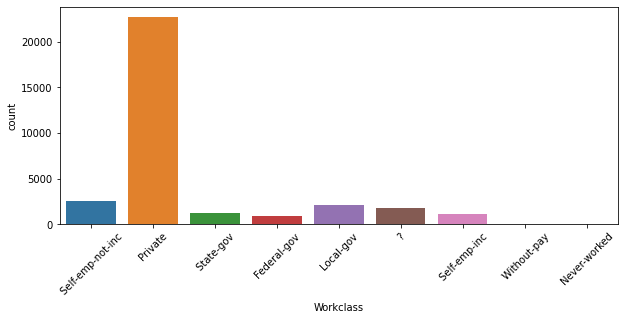

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(df['Workclass'])
plt.xticks(rotation = 45)
df['Workclass'].value_counts()

In this Dataset there are most of the people have private job

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

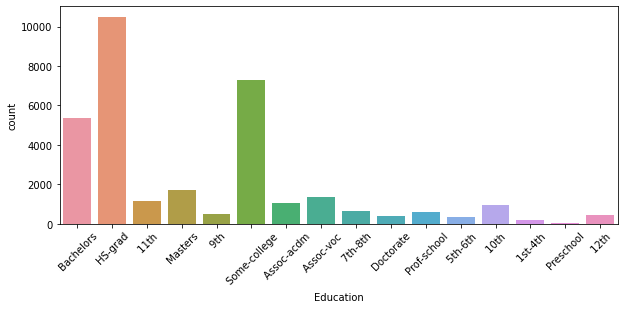

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(df['Education'])
plt.xticks(rotation = 45)
df['Education'].value_counts()

Most of the people have HS -grad and Bachelors education in the dataset 

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

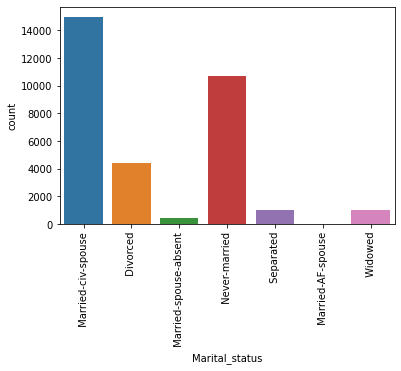

In [ ]:
sns.countplot(df['Marital_status'])
plt.xticks(rotation = 90)
df['Marital_status'].value_counts()


Married people have more numbers comparing to the others 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

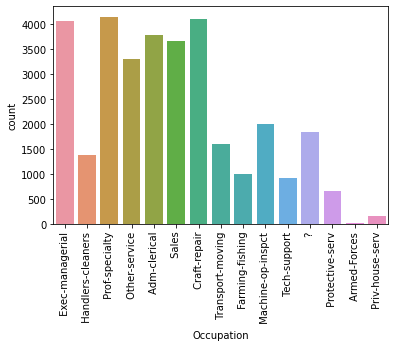

In [ ]:
sns.countplot(df['Occupation'])
plt.xticks(rotation = 90)
df['Occupation'].value_counts()


 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

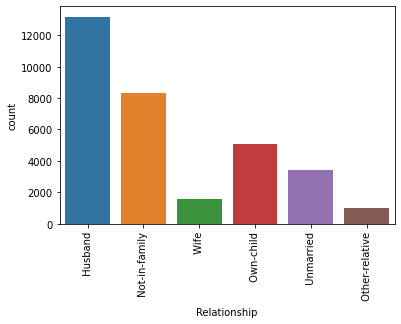

In [ ]:
sns.countplot(df['Relationship'])
plt.xticks(rotation = 90)
df['Relationship'].value_counts()


Most of the people are in Husband relationship

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

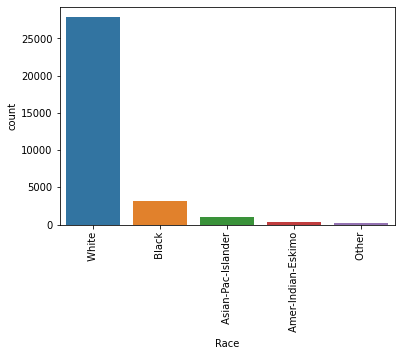

In [ ]:
sns.countplot(df['Race'])
plt.xticks(rotation = 90)
df['Race'].value_counts()


 Male      21789
 Female    10771
Name: Sex, dtype: int64

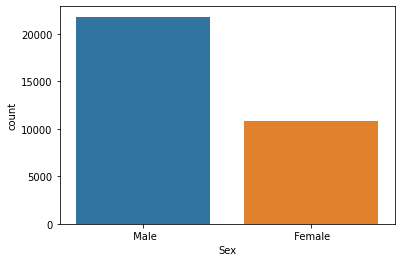

In [ ]:
sns.countplot(df['Sex'])
df['Sex'].value_counts()


Males are more in this dataset

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

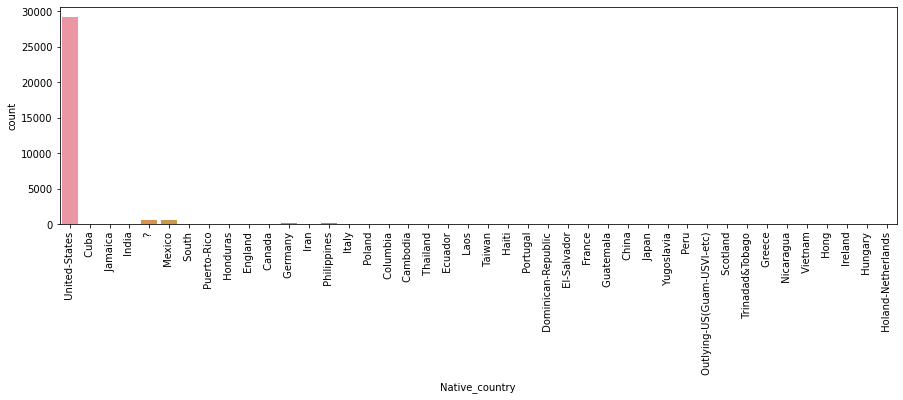

In [ ]:
plt.figure(figsize = (15,4))
sns.countplot(df['Native_country'])
plt.xticks(rotation = 90)
df['Native_country'].value_counts()


Most of the people native from United States

In [ ]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

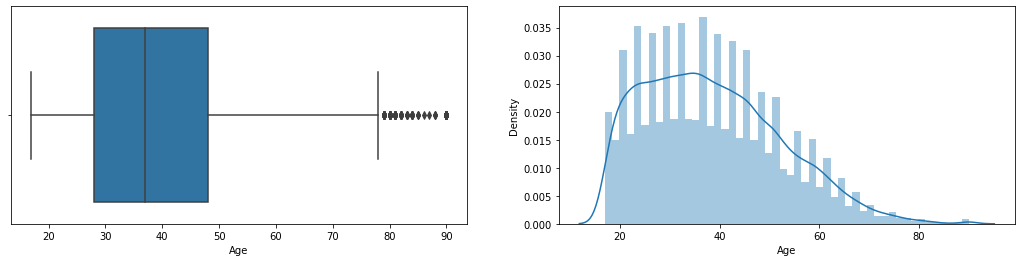

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.subplot(1,2,2)
sns.distplot(df['Age'])

As we can see there are outlier present in the dataset and data skewness is also there

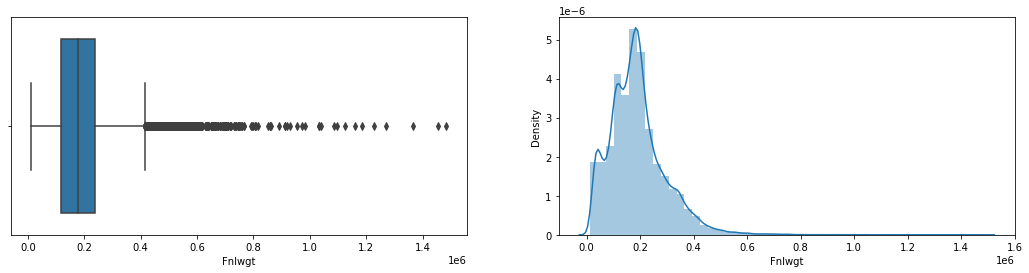

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Fnlwgt'])
plt.subplot(1,2,2)
sns.distplot(df['Fnlwgt'])

As we can see there are outlier present in the dataset and data skewness is also there

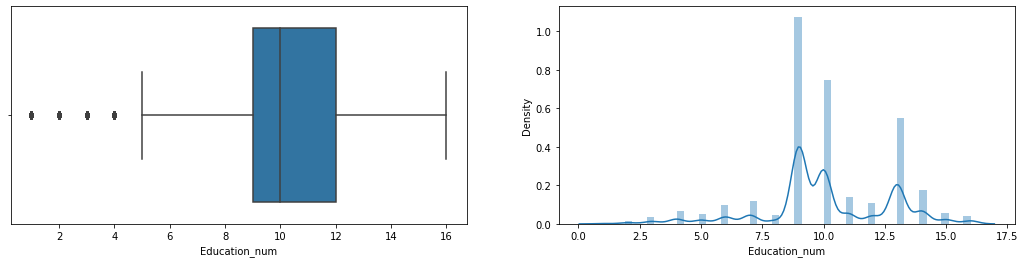

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Education_num'])
plt.subplot(1,2,2)
sns.distplot(df['Education_num'])

As we can see there are outlier present in the dataset and data is negatively skewed

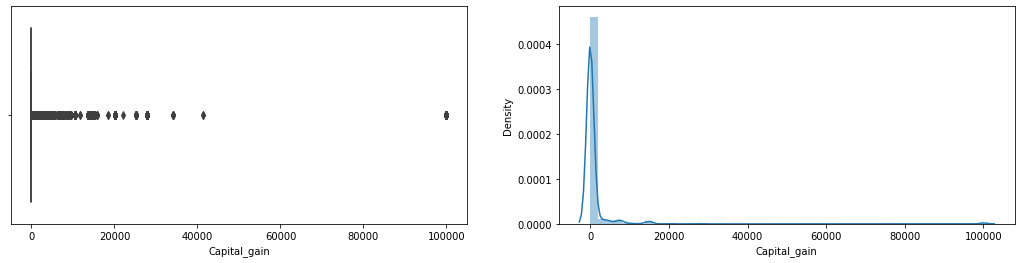

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Capital_gain'])
plt.subplot(1,2,2)
sns.distplot(df['Capital_gain'])

As we can see there are outlier present in the dataset and data skewness is also there

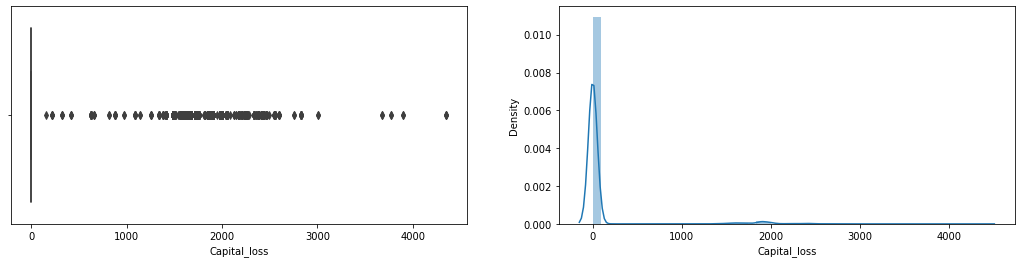

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Capital_loss'])
plt.subplot(1,2,2)
sns.distplot(df['Capital_loss'])

As we can see there are outlier present in the dataset and data skewness is also there

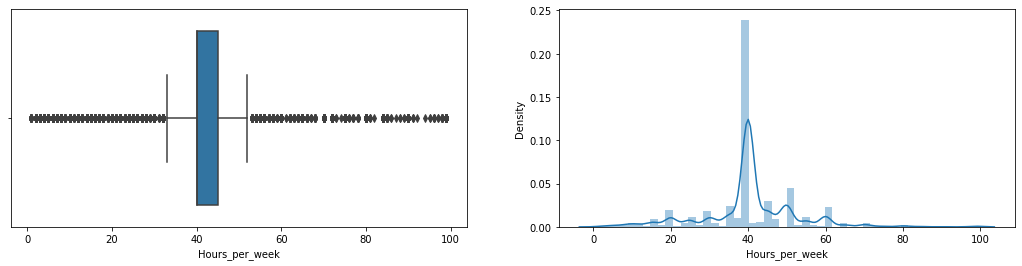

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['Hours_per_week'])
plt.subplot(1,2,2)
sns.distplot(df['Hours_per_week'])

The data is skewedd from both sides

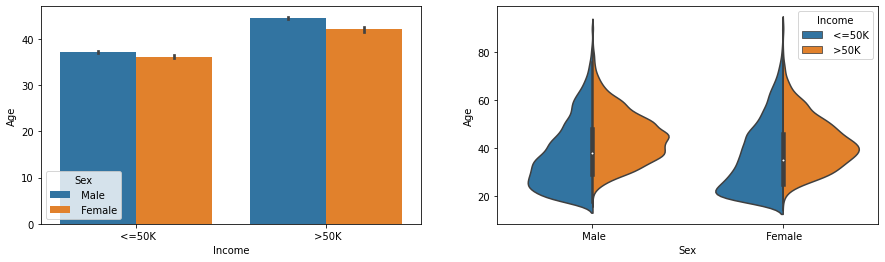

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Income',y = 'Age',hue = 'Sex')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Sex',y ='Age',hue= 'Income',split =True)

People age between 40 to 50 have more than 50k income

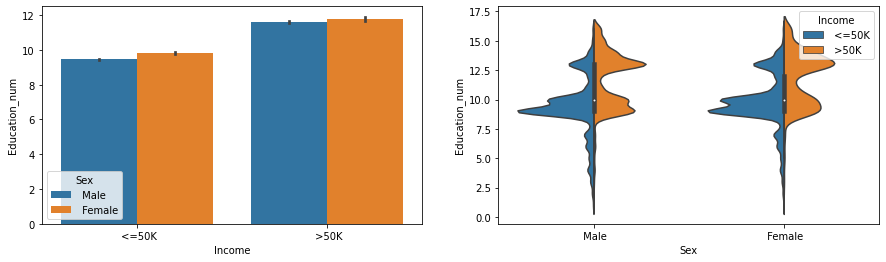

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Income',y = 'Education_num',hue = 'Sex')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Sex',y ='Education_num',hue= 'Income',split =True)

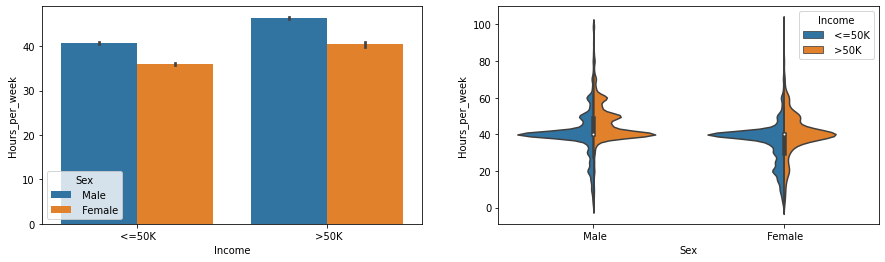

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Income',y = 'Hours_per_week',hue = 'Sex')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Sex',y ='Hours_per_week',hue= 'Income',split =True)

People work between 40 to 45 hours per week have more than 50k income 

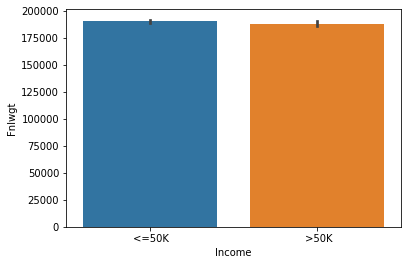

In [ ]:
sns.barplot(data = df, x= 'Income',y = 'Fnlwgt')

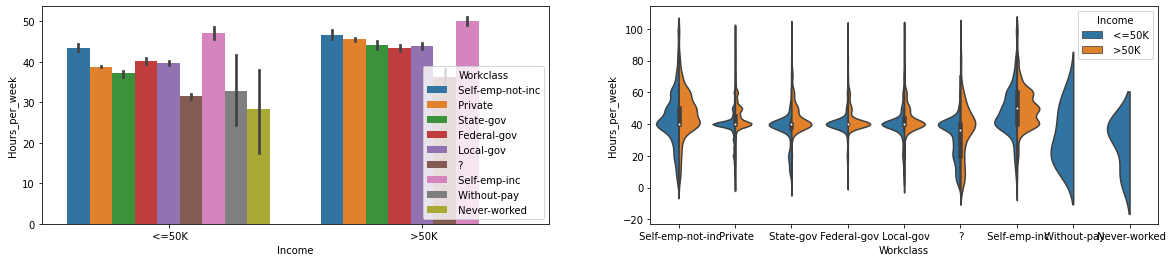

In [ ]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Income',y = 'Hours_per_week',hue = 'Workclass')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Workclass',y ='Hours_per_week',hue= 'Income',split =True)



Not much corelation in both of the columns

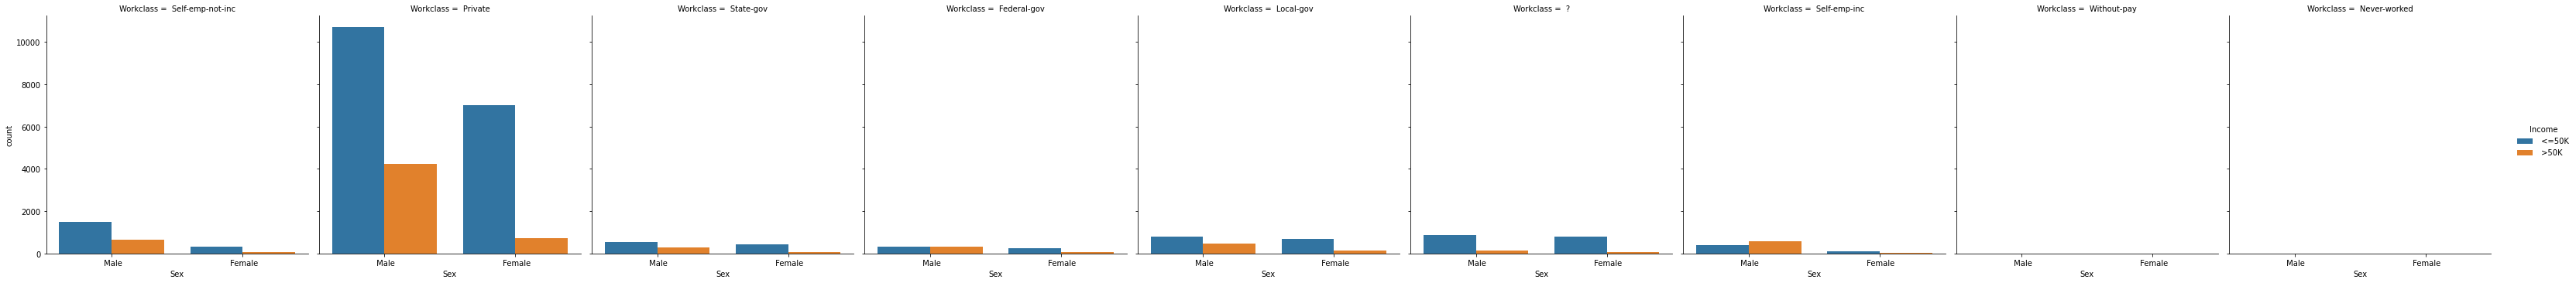

In [ ]:
sns.catplot(data =df, x= 'Sex',hue ='Income',
           kind = 'count',col = 'Workclass')

The numbers of Private workclass people whom have more than 50k salary are more and also less than 50k salary are more

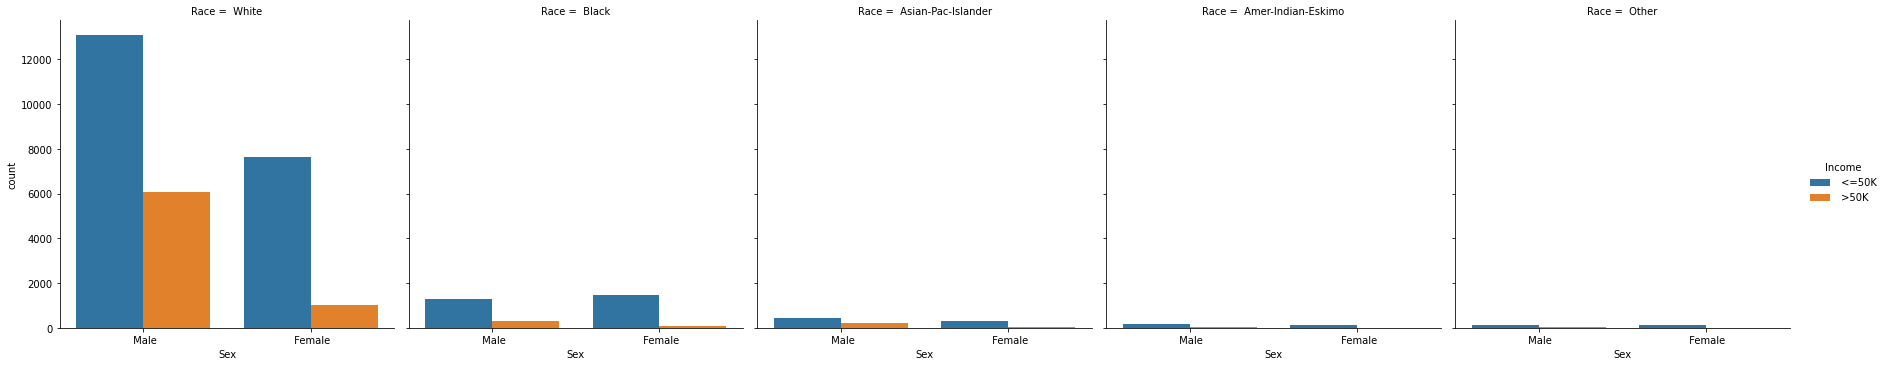

In [ ]:
sns.catplot(data =df, x= 'Sex',hue ='Income',
           kind = 'count',col = 'Race')

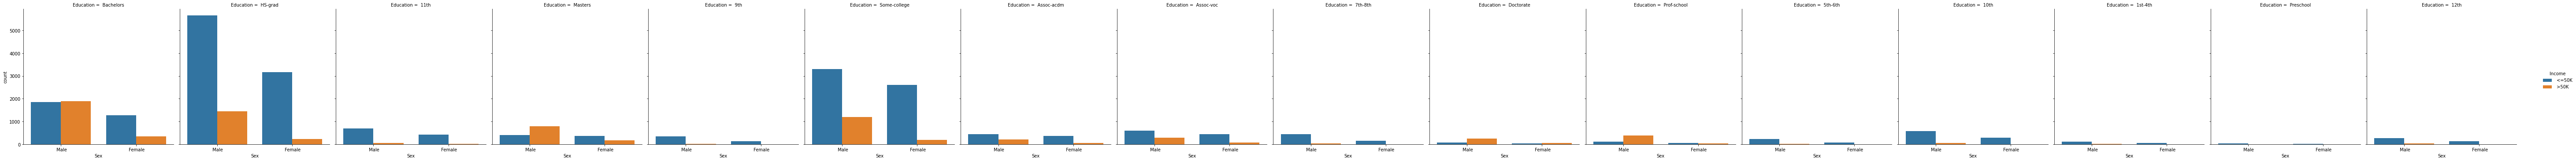

In [ ]:
sns.catplot(data =df, x= 'Sex',hue ='Income',
           kind = 'count',col = 'Education')

Therre is no major corelation between educaation and income all are equal to each other

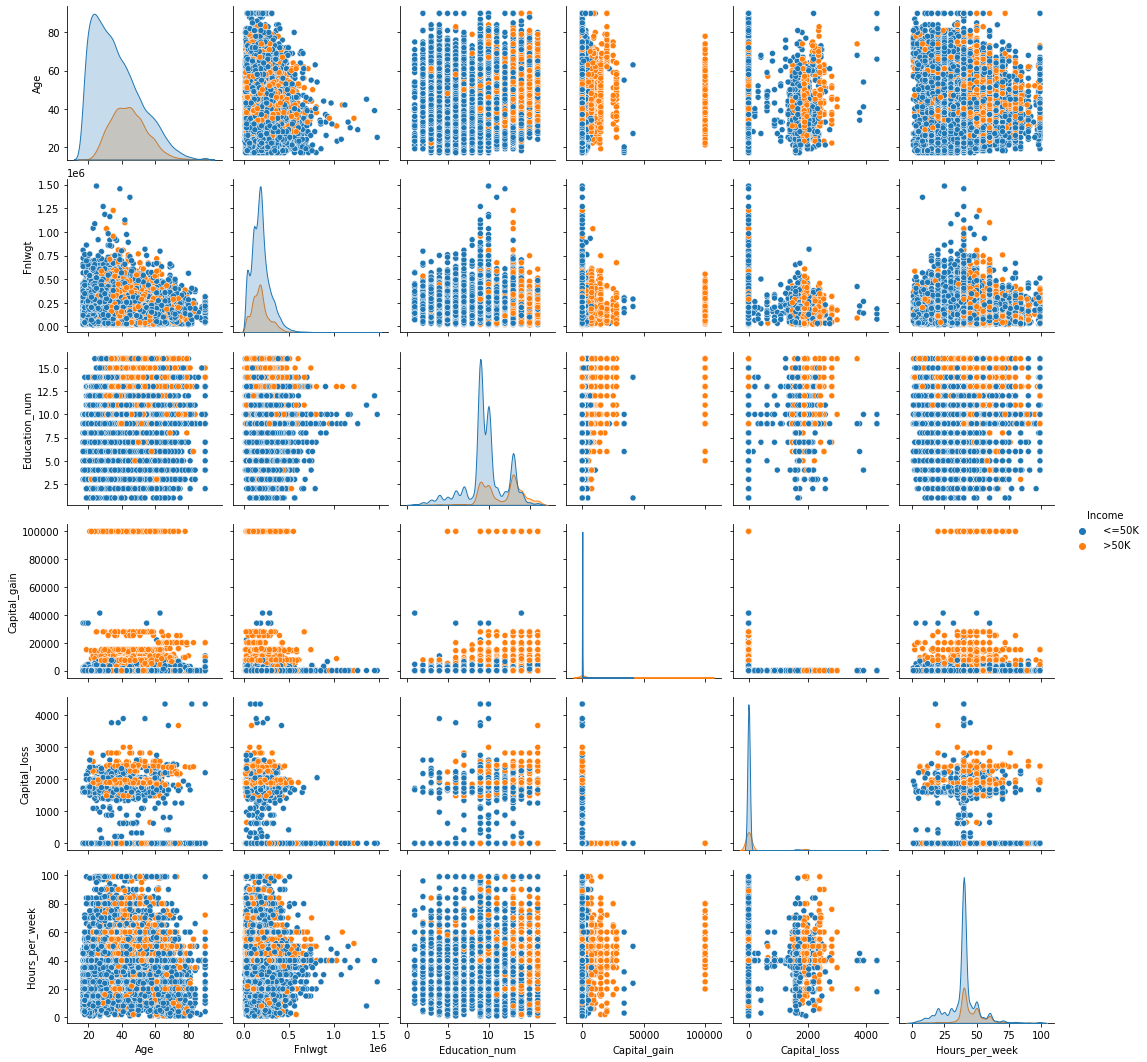

In [ ]:
sns.pairplot(df,hue = 'Income')

In [ ]:
#Encoding the categorical data
encode = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship',
       'Race', 'Sex', 'Native_country','Income']
le = LabelEncoder()
for i in encode:
    df[i] = le.fit_transform(df[i])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


Encode the categorical data into numerical data

In [ ]:
df_corr = df.corr().abs()

In [ ]:
df_corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,0.076646,0.010508,0.036527,0.266292,0.020946,0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.001151,0.234039
Workclass,0.003786,1.000000,0.016587,0.023537,0.052015,0.064798,0.255004,0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,0.007710,0.051645
Fnlwgt,0.076646,0.016587,1.000000,0.028156,0.043159,0.028184,0.001554,0.008922,0.021278,0.026882,0.000437,0.010259,0.018770,0.051957,0.009481
Education,0.010508,0.023537,0.028156,1.000000,0.359172,0.038398,0.021274,0.010879,0.014135,0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,0.043159,0.359172,1.000000,0.069338,0.109748,0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,0.266292,0.064798,0.028184,0.038398,0.069338,1.000000,0.009617,0.185461,0.068025,0.129337,0.043398,0.034182,0.190521,0.023827,0.199295
Occupation,0.020946,0.255004,0.001554,0.021274,0.109748,0.009617,1.000000,0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,0.012532,0.075448
Relationship,0.263698,0.090449,0.008922,0.010879,0.094145,0.185461,0.075620,1.000000,0.116052,0.582453,0.057918,0.061064,0.248975,0.005504,0.250924
Race,0.028718,0.049720,0.021278,0.014135,0.031825,0.068025,0.006779,0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,0.027349,0.012256,0.129337,0.080328,0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.008125,0.215995


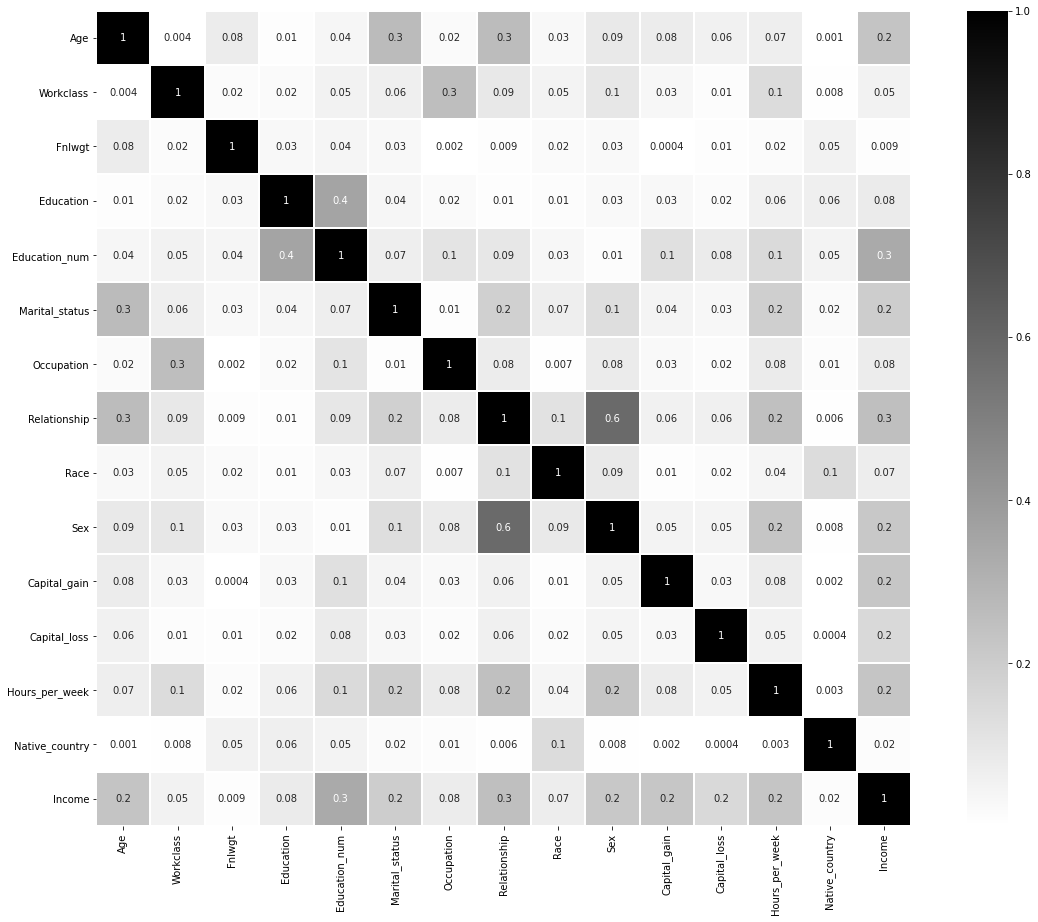

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df_corr,annot = True,square = True,
           fmt='.1g', linewidth = 1,cmap = 'binary')

As we can see there are no major coralation between the columns

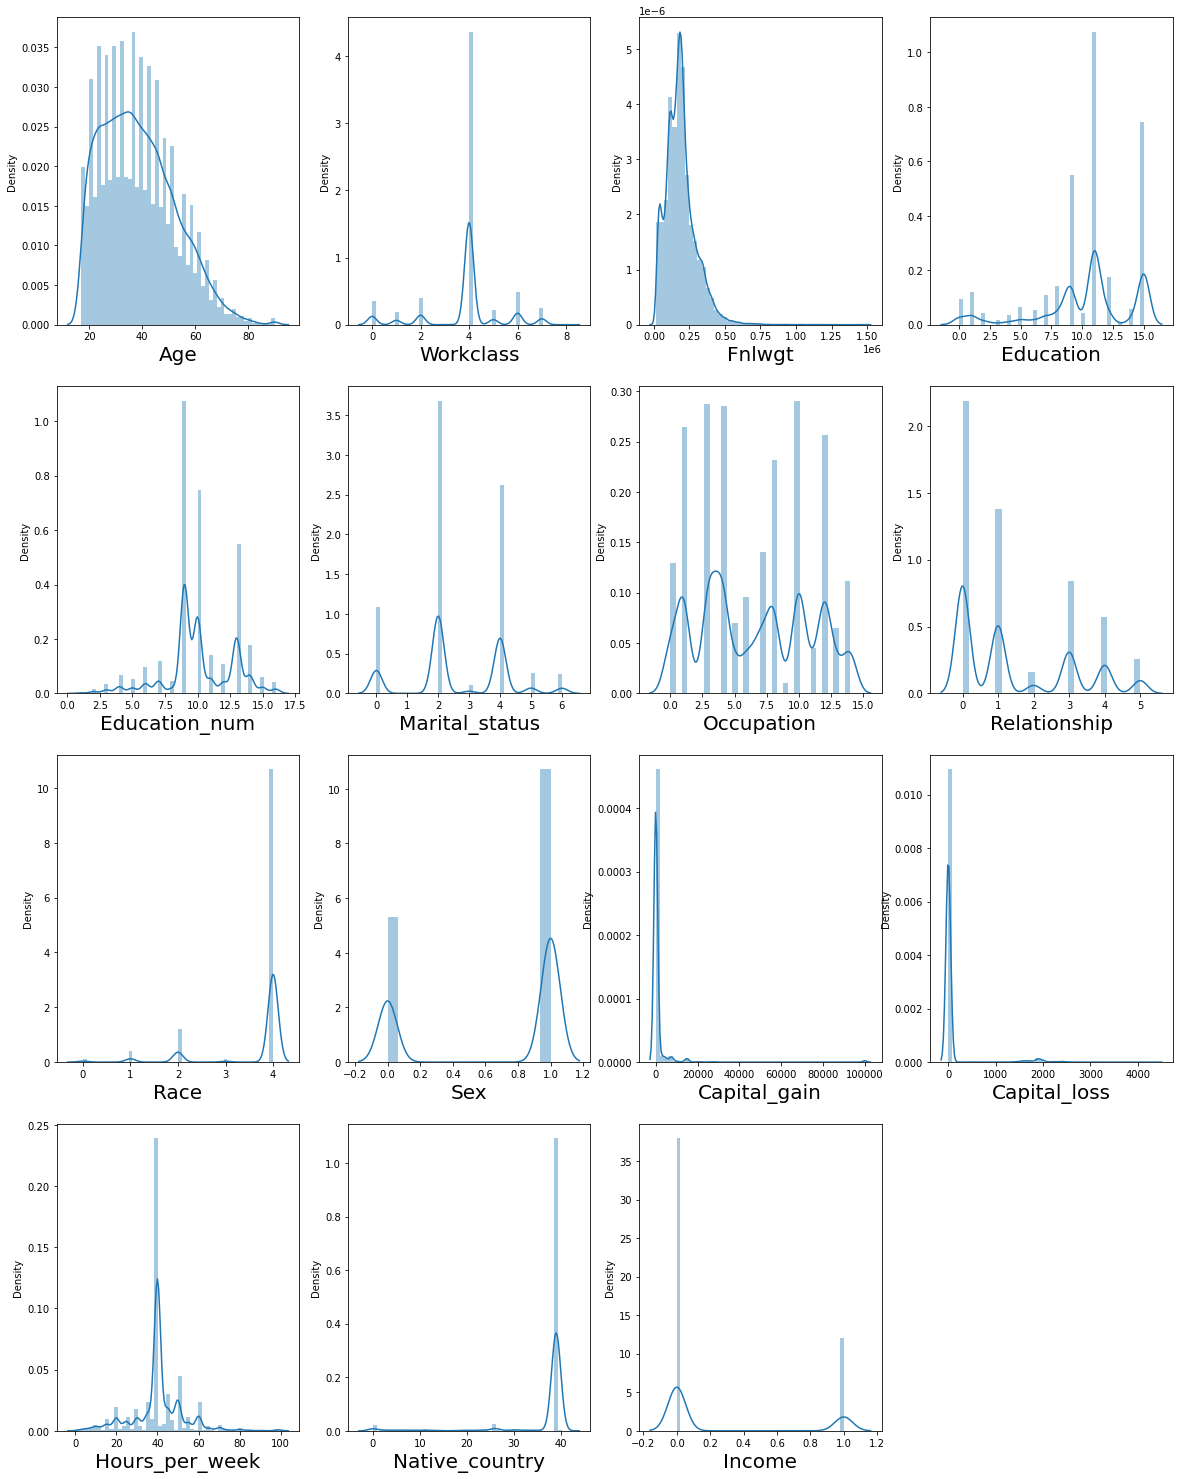

In [ ]:
plt.figure(figsize = (20,26))
plotnumber = 1

for column in  df:
    if plotnumber <=15 :
        ax =plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [ ]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Skewness before removing outliers

In [ ]:
#Removing outliers using zscore method
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis = 1)]

Outliers removed

In [ ]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss:',((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (32560, 15)
Shape After: (27417, 15)
Percentage Loss: 15.795454545454547


We removed outliers in above code but in result we get 15 % data loss and this much data loss is not acceptable we should have to use diff method to remove outlier

In [ ]:
#Using IQR method for removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

df_new = df[~((df < (Q1 - 1.5* IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]

By using IQR method we removed outliers

In [ ]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',df_new.shape)
print('Percentage Loss :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (32560, 15)
Shape After: (7888, 15)
Percentage Loss : 75.77395577395578


By IQR method we get 75.77 data loss and thats huge ,
So we don't remove the outliers and proceed further as it is

In [ ]:
#Seprating the target variable 
x = df.drop('Income',axis = 1)
y = df['Income']

In [ ]:
x.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

As we see there are huge skewness in the dataset so we have to remove this 

In [ ]:
#Skewness removed
x['Age'] = np.sqrt(x['Age'])
x['Fnlwgt'] = np.sqrt(x['Fnlwgt'])
x['Capital_gain'] = np.sqrt(x['Capital_gain'])
x['Capital_loss'] = np.sqrt(x['Capital_loss'])

Skewness removed by sqrt method

In [ ]:
x.skew()

Age               0.204335
Workclass        -0.752280
Fnlwgt            0.189066
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.556495
Capital_loss      4.322084
Hours_per_week    0.227636
Native_country   -3.658235
dtype: float64

After removing skewness we can see that some of the columns still  have skewness andd some of the columns skewness is reduced

In [ ]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

As we see above there are class imbalancing problem in the dataset

In [ ]:
#Resampling the data
SM = SMOTE()
x,y = SM.fit_resample(x,y)

Resampling the data by SMOTE method 

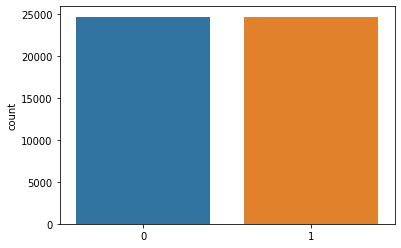

In [ ]:
sns.countplot(y)

As we can see Class imbalancing problem has been cured

In [ ]:
#Scaling the data 
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

Scaling the data using StandardScaler method

In [ ]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    pred = log_reg.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is',maxAccu, 'on Random State',maxRS)

Best Accuracy is 0.7852750809061488 on Random State 189


By using the code we get 189 as best random state

In [ ]:
x_train ,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

Accuracy_Score : 0.7852750809061488
Confusion_Matrix:
 [[4814 1385]
 [1269 4892]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      6199
           1       0.78      0.79      0.79      6161

    accuracy                           0.79     12360
   macro avg       0.79      0.79      0.79     12360
weighted avg       0.79      0.79      0.79     12360

Roc_Auc Score: 0.7853019054573127


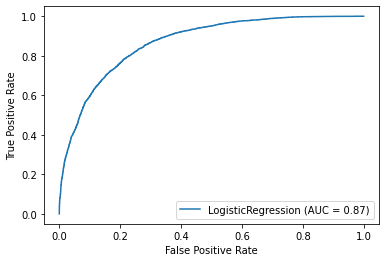

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
predlr = log_reg.predict(x_test)
LRC = accuracy_score(y_test,predlr)
print('Accuracy_Score :',LRC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predlr))
print('Classification_Report:\n',classification_report(y_test,predlr))
print('Roc_Auc Score:',roc_auc_score(y_test,predlr))

metrics.plot_roc_curve(log_reg, x_test, y_test)  
plt.show()  

By using LogisticRegression we get 78.52 accuracy score

Accuracy_Score : 0.863915857605178
Confusion_Matrix:
 [[5340  859]
 [ 823 5338]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      6199
           1       0.86      0.87      0.86      6161

    accuracy                           0.86     12360
   macro avg       0.86      0.86      0.86     12360
weighted avg       0.86      0.86      0.86     12360

Roc_Auc Score: 0.8639235260521179


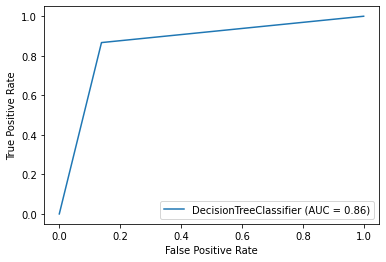

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
DTC = accuracy_score(y_test,preddt)
print('Accuracy_Score :',DTC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,preddt))
print('Classification_Report:\n',classification_report(y_test,preddt))
print('Roc_Auc Score:',roc_auc_score(y_test,preddt))

metrics.plot_roc_curve(dt, x_test, y_test)  
plt.show()  

By using DecisionTreeClassifier we get 86.39 accuracy score

Accuracy_Score : 0.9059061488673139
Confusion_Matrix:
 [[5643  556]
 [ 607 5554]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      6199
           1       0.91      0.90      0.91      6161

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360

Roc_Auc Score: 0.9058925735805832


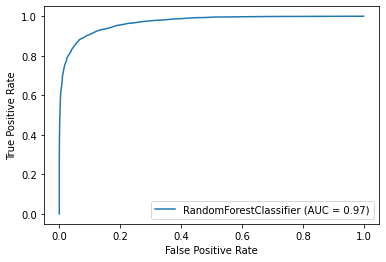

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
RFC = accuracy_score(y_test,predrf)
print('Accuracy_Score :',RFC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predrf))
print('Classification_Report:\n',classification_report(y_test,predrf))
print('Roc_Auc Score:',roc_auc_score(y_test,predrf))

metrics.plot_roc_curve(rf, x_test, y_test)  
plt.show()  

By using RandomForestClassifier we get 90.59 accuracy score

Accuracy_Score : 0.8571197411003236
Confusion_Matrix:
 [[4995 1204]
 [ 562 5599]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      6199
           1       0.82      0.91      0.86      6161

    accuracy                           0.86     12360
   macro avg       0.86      0.86      0.86     12360
weighted avg       0.86      0.86      0.86     12360

Roc_Auc Score: 0.8572780835293974


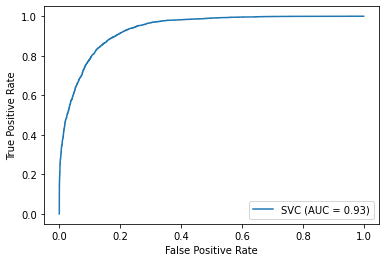

In [ ]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
SVC = accuracy_score(y_test,predsvc)
print('Accuracy_Score :',SVC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predsvc))
print('Classification_Report:\n',classification_report(y_test,predsvc))
print('Roc_Auc Score:',roc_auc_score(y_test,predsvc))

metrics.plot_roc_curve(svc, x_test, y_test)  
plt.show()  

By using SVC we get 85.71 accuracy score

In [ ]:
#Calculating Cross_Val_score
LRCV = cross_val_score(log_reg, x, y, cv = 5)
print('Cross Validation score of LogisticRegression model:',LRCV.mean())

Cross Validation score of LogisticRegression model: 0.7389256650310319


In [ ]:
DTCV = cross_val_score(dt, x, y, cv = 5)
print('Cross Validation score of DecisionTree model:',DTCV.mean())

Cross Validation score of DecisionTree model: 0.8525043304879114


In [ ]:
RFCV = cross_val_score(rf,x,y,cv = 5)
print('Cross Validation score of RandomForest model:',RFCV.mean())

Cross Validation score of RandomForest model: 0.8909362159718738


In [ ]:
SVCV = cross_val_score(svc,x,y,cv = 5)
print('Cross Validation score of SVC model:',SVCV.mean())

Cross Validation score of SVC model: 0.7504553640604854


In [ ]:
#Creating DataFrame of Difference between acc_Score and CV score
pd.DataFrame({'Model':['Logistic Regression','RandomForestClassifier','DecisionTreeClassifier','SVC'],
             'acc_score':[LRC,RFC,DTC,SVC],
             'cross_val_score':[LRCV.mean(),RFCV.mean(),DTCV.mean(),SVCV.mean()],
             'Difference':[(LRC-LRCV.mean()),(RFC-RFCV.mean()),(DTC-DTCV.mean()),(SVC-SVCV.mean())]})

,Model,acc_score,cross_val_score,Difference
0,Logistic Regression,0.785275,0.738926,0.046349
1,RandomForestClassifier,0.905906,0.890936,0.014970
2,DecisionTreeClassifier,0.863916,0.852504,0.011412
3,SVC,0.857120,0.750455,0.106664


From the above observation we can see that RandomForestClassifier and DecisionTreeClassifier have less diff between acc_score and cv_score, So we use both algo for GridSearchCv

In [ ]:
#GridSearchCV Parameteers for RandomForestClassifier
#Adding parameters 
parameters = {'n_estimators':[20,30,40,50,60],
              'criterion':['gini','entropy'],
              'max_depth':[2,3,4,5,6,7],
              'max_features':['auto','sqrt','log2'],
              'min_samples_leaf':[1,2,3,4,5]}

adding Parameters

In [ ]:
#Using GridSearchCV for finding best params
GCV = GridSearchCV(rf,parameters,cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 50}

Got the best parameters

Accuracy Score of the RF Model: 86.65857605177993
Cross Validation Score of RF Model is 86.01085510606423
Confusion Matrix:
 [[5018 1181]
 [ 468 5693]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      6199
           1       0.83      0.92      0.87      6161

    accuracy                           0.87     12360
   macro avg       0.87      0.87      0.87     12360
weighted avg       0.87      0.87      0.87     12360

roc_auc_score: 86.67618531704998


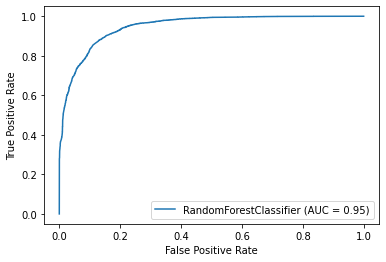

In [ ]:
finalmod = RandomForestClassifier(criterion = 'gini',max_depth =7, max_features = 'auto',n_estimators = 50, min_samples_leaf = 4,)

finalmod.fit(x_train,y_train)
pred = finalmod.predict(x_test)
print('Accuracy Score of the RF Model:',accuracy_score(y_test,pred)*100)
finalmodCV = cross_val_score(finalmod,x,y,cv = 5)
print('Cross Validation Score of RF Model is',finalmodCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(finalmod,x_test,y_test)
plt.show()


By adding the best params to the RandomForestRegressor we get 86.65  as acc_score and 86.01 as CV Score

In [1]:
#GridSearchCV Parameteers for DecisionTreeClassifier
#Adding parameters 
parameters = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'splitter' :['best', 'random']}

In [ ]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameters,cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'splitter': 'best'}

Got best params

Accuracy Score of the DT Model: 84.1747572815534
Cross Validation Score of DT is 82.8816862340565
Confusion Matrix:
 [[4889 1310]
 [ 646 5515]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      6199
           1       0.81      0.90      0.85      6161

    accuracy                           0.84     12360
   macro avg       0.85      0.84      0.84     12360
weighted avg       0.85      0.84      0.84     12360

roc_auc_score: 84.19112422879543


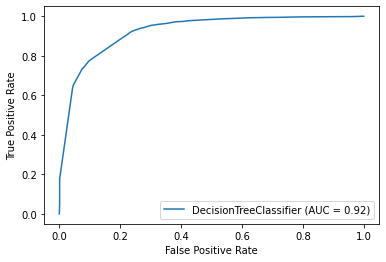

In [ ]:
mod = DecisionTreeClassifier(criterion = 'gini',max_features = 'sqrt',max_depth = 8,splitter = 'best')

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print('Accuracy Score of the DT Model:',accuracy_score(y_test,pred)*100)
modCV = cross_val_score(mod,x,y,cv = 5)
print('Cross Validation Score of DT is',modCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(mod,x_test,y_test)
plt.show()

By applying best params to the DecisionTreeClassifier we get 84.17 accuracy score and 82.88 cv score

In [ ]:
#Saving Final Model
import joblib
joblib.dump(finalmod,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']

Saving the best model which is Random Forest